<a href="https://colab.research.google.com/github/c0037654Newcastle/CSC2034-DS-Project/blob/main/CSC2034_DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC2034 - Data Science Project

##Google Colab Setup

In [20]:
!git clone https://github.com/c0037654Newcastle/CSC2034-DS-Project.git

Cloning into 'CSC2034-DS-Project'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), 100.80 KiB | 964.00 KiB/s, done.


In [21]:
import os
os.chdir('CSC2034-DS-Project')

##Importing the datasets
Importing the datasets for both varieties (red and white) of Portuguese Vinho Verde.

In [27]:
import pandas as pd

white_path = './data/winequality-white.csv'
red_path = './data/winequality-red.csv'

white_vihno_dataset = pd.read_csv(white_path, header = 0, sep=';')
red_vihno_dataset = pd.read_csv(red_path, header = 0, sep=';')

##Exploratory Data Analysis (EDA)

###1) A
*   Describe the distribution of wine quality across all samples, separately for red and white. (NEED TO DO)
*   Compare the quality distributions between reds and whites. (NEED TO DO)
*   Create suitable plots to illustrate

**NEED TO STILL DO THE FIRST TWO OBJECTIVE**


Distribution of the quality of the white vinho verde in the dataset

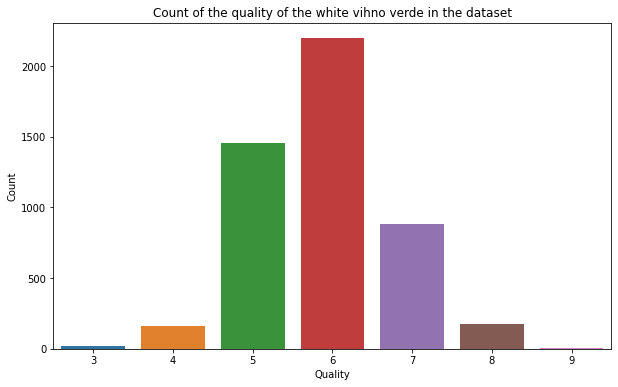

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
sns.countplot(x = "quality", data = white_vihno_dataset)
plt.title("Count of the quality of the white vihno verde in the dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks()
plt.show()
plt.close()

Distribution of the quality of the red vinho verde in the dataset

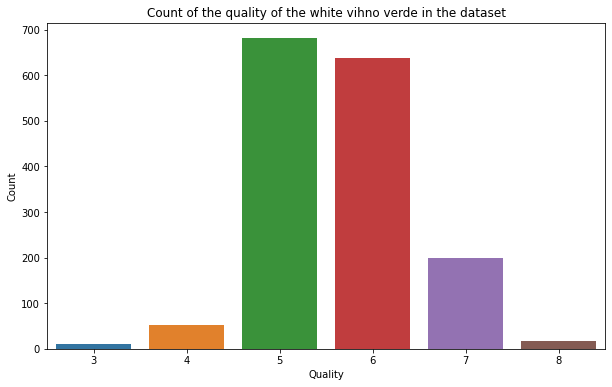

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
sns.countplot(x = "quality", data = red_vihno_dataset)
plt.title("Count of the quality of the white vihno verde in the dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks()
plt.show()
plt.close()

###1) B
*   Discretise the alcohol content variables into low, mid, high based on its distribution.
*   Create a 3-valued "alcohol_cat" variable to represent this.

Finding the average and standard deviation of the red and white vinho verde datasets

In [69]:
import numpy as np

white_average = np.mean(white_vihno_dataset['alcohol'])
white_stddev = np.std(white_vihno_dataset['alcohol'])
red_average = np.mean(red_vihno_dataset['alcohol'])
red_stddev = np.std(red_vihno_dataset['alcohol'])

print('White Vihno Verde Alcohol Average',white_average)
print('White Vihno Verde Alcohol Standard Deviation',white_stddev)
print('Red Vihno Verde Alcohol Average',red_average)
print('Red Vihno Verde Alcohol Standard Deviation',red_stddev)

White Vihno Verde Alcohol Average 10.514267047774602
White Vihno Verde Alcohol Standard Deviation 1.2304949365418656
Red Vihno Verde Alcohol Average 10.422983114446529
Red Vihno Verde Alcohol Standard Deviation 1.0653343003437483


Defining the alcohol categories for the reader

In [ ]:
print('White Alcohol level is less than',white_average - white_stddev, 'to be in the low category')

Function for categorising the alcohol level into low, mid and high based on the average and standard deviation 

In [73]:
def alcohol_category(alcohol_level, average, stddev):
  if alcohol_level < (average-stddev):
    return 'low'
  elif alcohol_level < (average + stddev):
    return 'mid'
  else:
    return 'high'

Apply the alcohol category function to red and white vihno verde datasets to create alcohol_cat column, and shows the first 5 entries of the updated dataset


In [ ]:
white_vihno_dataset['alcohol_cat'] = white_vihno_dataset['alcohol'].apply(alcohol_category, args=(white_average, white_stddev,))
red_vihno_dataset['alcohol_cat'] = red_vihno_dataset['alcohol'].apply(alcohol_category, args=(red_average, red_stddev,))

print(f"List of features:\n\t{white_vihno_dataset.columns}")

print(f"\nExamining the first 5 entries in the dataset:")
display(white_vihno_dataset)

###1) C
*   Describe the distribution of wine quality as in (1.A), but separately for low-, mid-, and high-alcohol content.
*   Create suitable plots to illustrate.
*    Can you draw any conclusions on the relationship between alcohol content and quality?



Histogram to show the cumulative value for each alcohol_cat in the White Vihno Verde dataset

In [ ]:
plt.figure(figsize = (12, 8))
sns.histplot(data=white_vihno_dataset, x="alcohol_cat", multiple="dodge")
plt.title("Count of alcohol_cat in the White Vihno Verde dataset")
plt.xlabel("Alcohol_cat")
plt.ylabel("Count")
plt.show()
plt.close()

Histogram to shows the number of wines at each alcohol_cat rated a certain quality. The y axis had to be log scaled to make sure each bar was shown.

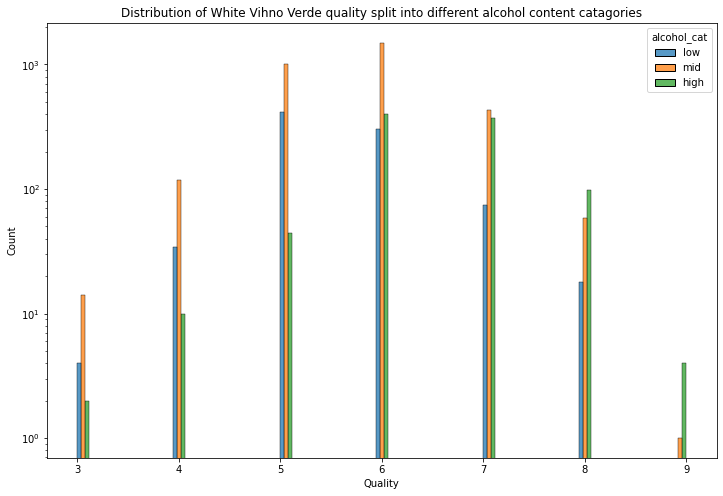

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


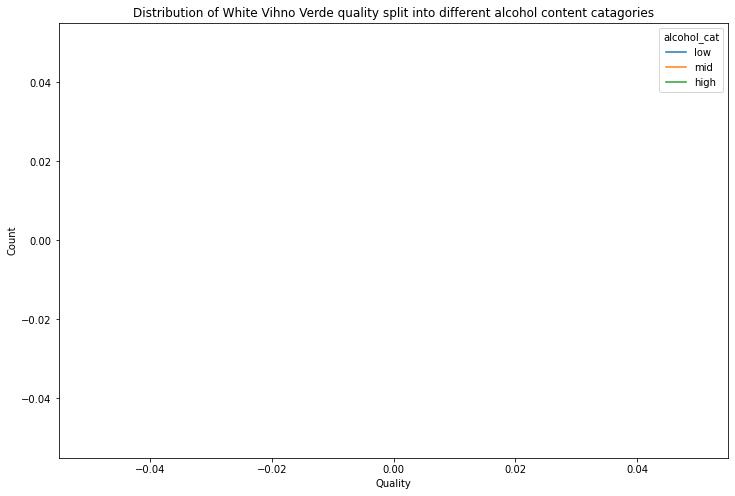

In [118]:
plt.figure(figsize = (12, 8))
sns.histplot(data=white_vihno_dataset, x="quality", hue="alcohol_cat", multiple="dodge")
plt.yscale('log')
plt.title("Distribution of White Vihno Verde quality split into different alcohol content catagories")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()


plt.figure(figsize = (12, 8))
sns.lineplot(data=white_vihno_dataset, x="quality", hue="alcohol_cat")
plt.title("Distribution of White Vihno Verde quality split into different alcohol content catagories")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

